Going through paper: https://pubs.rsc.org/en/content/articlelanding/2002/LC/b208031c

Assuming that $y_{act} [-]$ is the moisture content in the air at temperature $T$, then the vapor pressure is $p_{act} = y_{act} \times P$. 

Assuming that $y_{sat} [-]$ is the saturation moisture content in the air at temperature $T$, then the vapor pressure is $p_{sat} = y_{sat} \times P$.

For an airflow of $Q_{air} [m^3/s]$, the evaporation rate ($Q_v [m^3/s]$) reads $Q_v = Q_{air} \times |(y_{sat} - y_{act})|$. 

**If $P = 1 atm$, $\implies Q_v = Q_{air} \times |(p_{sat} - p_{act})|$.**

**The units of flowrate remains the same. Therefore equation 2 is irrelavant (As it intent to convert the Pressure unit via $PV=nRT$), while $p$ is nondimentional as divided by 1atm.**

**Hydrolic resistance**, as per definition, is $R_{hy} = \frac {\Delta P}{Q_v}$, with unit $[Pa.s/m^3]$. Therefore, pressure drop ($\Delta P [Pa]$) can be calculated as $\Delta P = R_{hy} \times Q_v$. This essentially plugs in *Hagen–Poiseuille* law. 

$\Delta P = R_{hy} \times Q_{air} \times |(p_{sat} - p_{act})|$

A list of $R_{hy}$ for different channel shapes is given bellow: 

url: https://homes.nano.aau.dk/lg/Lab-on-Chip2010_files/HenrikBruus_Microfluidics%20lectures.pdf

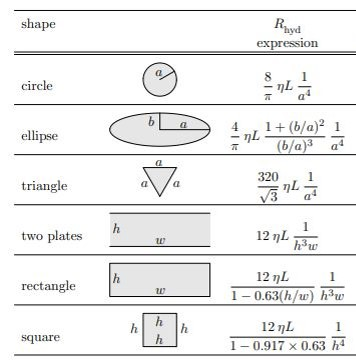

From rectangle relationship above:

a negative pressure is induced if a negetaive hydraulic resistance is generated, which in turn requires:

 $w < 0.63 \times h$, 
 
 where $w$ is width and $h$ is height of channel.

**To mitigate a negative pressure then, channel should always meet $w > 0.63 \times h$.**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

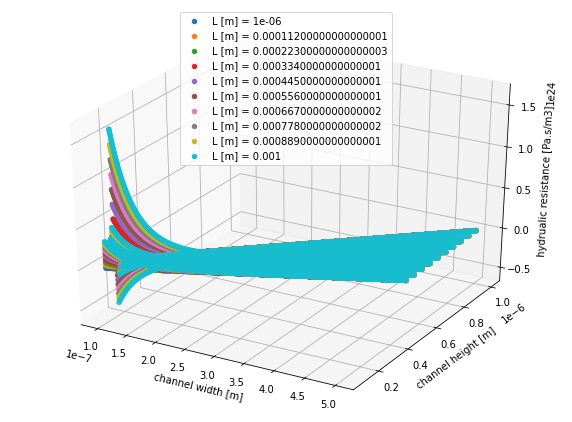

In [ ]:
W = np.linspace(100e-9, 500e-9, 1000)
Aspect = np.linspace(math.floor(1/0.63), math.ceil(1/0.63), 10)
L = np.linspace(1e-6, 1000e-6, 10)
#
etta = 1e-3 #Pa.s water - assumed constan @ T = cte
Qv = 1e-8 #=0.01cc/s
#
fig, axs = plt.subplots(figsize=(10,7.5), subplot_kw=dict(projection='3d'))
#
for l in L:
  trj_w = []
  trj_h = []
  trj_R_hydro = []
  for w in W:
    for aspect in Aspect:
      h = aspect * w
      trj_w.append(w)
      trj_h.append(h)
      R_hydro = 12*etta*l/((1-0.63*h/w)*(h**3)*w)
      trj_R_hydro.append(R_hydro)
  axs.scatter(trj_w, trj_h, trj_R_hydro, label='L [m] = 'f'{l}')
  axs.legend(loc = 'upper center')
  axs.set_xlabel('channel width [m]')
  axs.set_ylabel('channel height [m]')
  axs.set_zlabel('hydrualic resistance [Pa.s/m3]')
plt.show()  

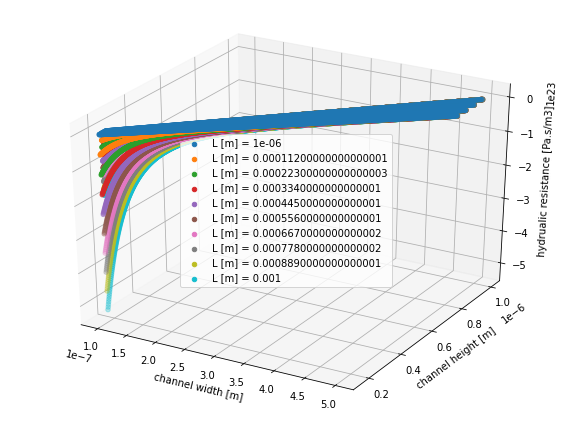

In [ ]:
W = np.linspace(100e-9, 500e-9, 1000)
Aspect = np.linspace(math.floor(1/0.63), math.ceil(1/0.63), 10)
L = np.linspace(1e-6, 1000e-6, 10)
#
etta = 1e-3 #Pa.s water - assumed constan @ T = cte
Qv = 1e-8 #=0.01cc/s
#
fig, axs = plt.subplots(figsize=(10,7.5), subplot_kw=dict(projection='3d'))
#
for l in L:
  trj_w = []
  trj_h = []
  trj_R_hydro = []
  for w in W:
    for aspect in Aspect:
      h = aspect * w
      R_hydro = 12*etta*l/((1-0.63*h/w)*(h**3)*w)
      if R_hydro<0:
        trj_w.append(w)
        trj_h.append(h)
        trj_R_hydro.append(R_hydro)
  if trj_R_hydro:
    axs.scatter(trj_w, trj_h, trj_R_hydro, label='L [m] = 'f'{l}')
    axs.legend(loc = 'center')
    axs.set_xlabel('channel width [m]')
    axs.set_ylabel('channel height [m]')
    axs.set_zlabel('hydrualic resistance [Pa.s/m3]')
plt.show()  

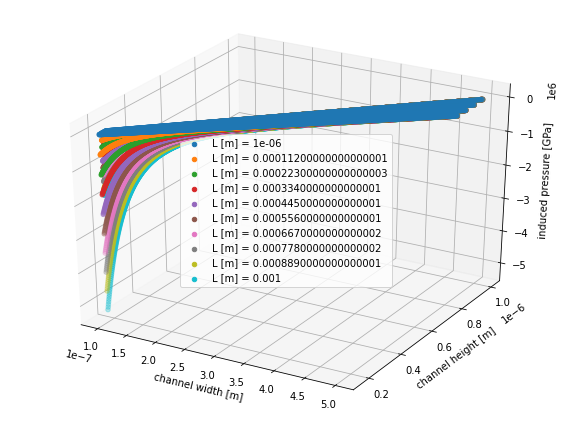

In [ ]:
W = np.linspace(100e-9, 500e-9, 1000)
Aspect = np.linspace(math.floor(1/0.63), math.ceil(1/0.63), 10)
L = np.linspace(1e-6, 1000e-6, 10)
#
etta = 1e-3 #Pa.s water - assumed constan @ T = cte
Qv = 1e-8 #=0.01cc/s
#
fig, axs = plt.subplots(figsize=(10,7.5), subplot_kw=dict(projection='3d'))
#
for l in L:
  trj_w = []
  trj_h = []
  trj_dP = []
  for w in W:
    for aspect in Aspect:
      h = aspect * w
      R_hydro = 12*etta*l/((1-0.63*h/w)*(h**3)*w)
      dP = R_hydro * Qv / 1e9
      if dP<0:
        trj_w.append(w)
        trj_h.append(h)
        trj_dP.append(dP)
  if trj_dP:
    axs.scatter(trj_w, trj_h, trj_dP, label='L [m] = 'f'{l}')
    axs.legend(loc = 'center')
    axs.set_xlabel('channel width [m]')
    axs.set_ylabel('channel height [m]')
    axs.set_zlabel('induced pressure [GPa]')
plt.show()  